In [195]:
# Install Spark 3.0.1
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.0.1/spark-3.0.1-bin-hadoop2.7.tgz
!tar xf spark-3.0.1-bin-hadoop2.7.tgz

In [196]:
# Set Environment Variables
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.1-bin-hadoop2.7"

In [197]:
!python -m pip install --upgrade pyspark==2.4.0
!python -m pip install -q findspark

In [198]:
import findspark
findspark.init()

In [199]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [200]:
from pyspark.sql import SparkSession

In [201]:
APP_NAME = "FINAL"

In [202]:
spark = SparkSession.builder.appName(APP_NAME).getOrCreate()

In [203]:
spark = SparkSession.builder.appName(APP_NAME).getOrCreate()

In [204]:
spark

In [205]:
 #List your Google Drive contents
!ls -al "/content/drive/MyDrive/Colab/Salary_Data.csv"

-rw------- 1 root root 503178 Aug 29 23:33 /content/drive/MyDrive/Colab/Salary_Data.csv


In [206]:
# Define the options
options = {
    "header": "true",
    "inferSchema": "true"
}

# Read CSV
file_path = "/content/drive/MyDrive/Colab/Salary_Data.csv"
df = spark.read.options(**options).csv(file_path)

# Print
df.show(10)

+---+----+------+---------------+--------------------+-------------------+--------+---------+----------+
|_c0| Age|Gender|Education Level|           Job Title|Years of Experience|  Salary|  Country|      Race|
+---+----+------+---------------+--------------------+-------------------+--------+---------+----------+
|  0|32.0|  Male|     Bachelor's|   Software Engineer|                5.0| 90000.0|       UK|     White|
|  1|28.0|Female|       Master's|        Data Analyst|                3.0| 65000.0|      USA|  Hispanic|
|  2|45.0|  Male|            PhD|      Senior Manager|               15.0|150000.0|   Canada|     White|
|  3|36.0|Female|     Bachelor's|     Sales Associate|                7.0| 60000.0|      USA|  Hispanic|
|  4|52.0|  Male|       Master's|            Director|               20.0|200000.0|      USA|     Asian|
|  5|29.0|  Male|     Bachelor's|   Marketing Analyst|                2.0| 55000.0|      USA|  Hispanic|
|  6|42.0|Female|       Master's|     Product Manager| 

## Extra Credit Opportunities!

- If you provide a link to this notebook on your public GitHub page instead of turning it in as an attachment, you will get 2 points extra credit.
https://github.com/Abshake06/DSCI_632_Final/blob/main/DSCI_632_Final_Abhishek.ipynb


- Extra credit will be given for using the [Google Cloud SDK](https://cloud.google.com/sdk/) to create/use/destroy any cloud resources, up to 2 points per section, 8 points total.
 - Don't be afraid to look at the GCP example colab notebooks from the class notes, the GCP documentation, or GitHub for examples.
- If this notebook is self-contained, you will get 5 points extra credit. (Requirements below)
 - The data is imported without relying on Google Drive, as the paths to data in Google Drive are user-specific. Downloads from public storage buckets/services are fine. (1 point)
 - It be run from start to finish without making any changes to paths, code, or variable names. (1 point)
 - All calls to external services, including GCP, are done programatically, no screenshots explaining how it worked in a browser console. (Using an API or SDK, 2 points)
 - All cloud resources are destroyed at the end of the notebook in a seperate section (Also via API or SDK, 1 point)

# Section 1: Define and describe the dataset

10 points

Import the dataset, and describe why you'll be analyzing in it. You can summarize a few columns, show a more information on the relavent features, or but help the reader understand what the dataset is, what is in it, and why you picked it.

Some questions that it might help you to answer:
1. Why are you choosing this dataset?

Ans: Income disparity is a pervasive global issue, with significant variations across countries, races, genders, and other demographic factors such as educational attainment and professional experience. Examining these patterns can provide valuable insights into the existence of potential salary inequalities.
2. What variables will you use?

Ans:
1. Country: The country where the individual is located.
2. Race: The racial background of the individual.
3. Salary: The salary of the individual in USD.
4. Age: The age of the individual.
5. Gender: The gender of the individual.
6. Education: The educational qualification of the individual.
7. YearsOfExperience: The years of professional experience.
8. JobTitle: The job title of the individual.


3. What analysis(es) will you run?

Ans:
`Descriptive Statistics:` Calculate summary statistics for salary based on different countries and races to get an overall understanding of the distribution of salaries.

`Visualization:` Create histograms to visualize the distribution of salaries for different countries and races.

`Group Comparison:` Compare the mean salaries of different countries and races to identify potential disparities.

`Regression:` Perform regression analysis to predict the salary.

`Hypothesis Testing:` Test hypotheses about salary disparities based on different factors, such as whether there's a significant difference in average salaries between different sexes.



4. Do you have any hypotheses? What are they?

Ans:
1. Hypothesis 1: Salary Disparities based on gender
2. Hypothesis 2: Does higher education mean higher pay?
3. Hypothesis 3: Relation between salary, education and years of experience

### This section should include one or more of the following:
- A histogram of several features relavent to your analysis [INCLUDED]
- The schema of the dataset, with the datatypes assigned correctly [INCLUDED]
- A text cell with explainations of the relavent features in [markdown](https://www.markdownguide.org/cheat-sheet) [INCLUDED]
- Use Spark SQL or built-in methods to show a range of values [INCLUDED]
- Most common words/n-grams found

In [207]:
column_names = df.columns
print(column_names)

['_c0', 'Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience', 'Salary', 'Country', 'Race']


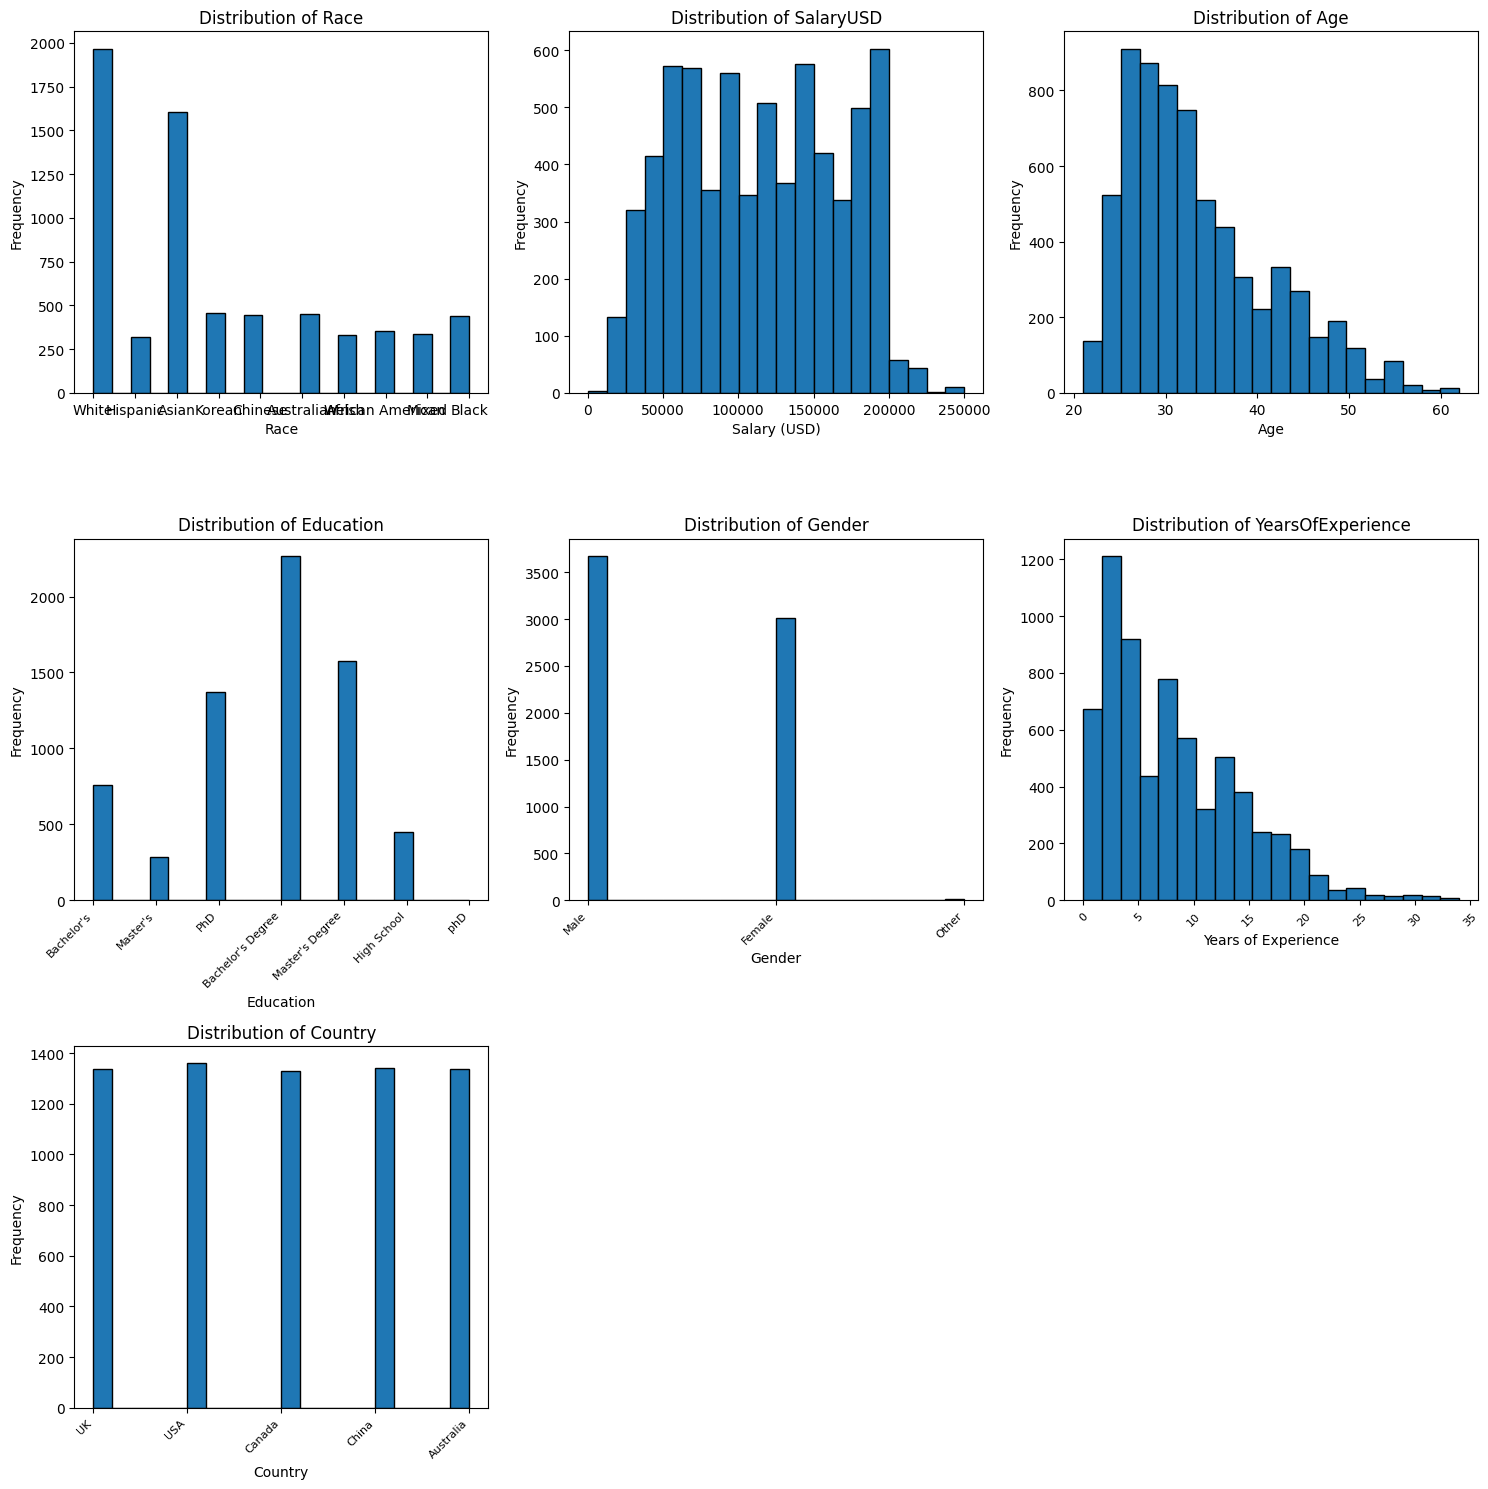

In [208]:
import matplotlib.pyplot as plt

# Convert the columns to Pandas Series for plotting
race_series = df.select('Race').toPandas()['Race']
salary_series = df.select('Salary').toPandas()['Salary']
age_series = df.select('Age').toPandas()['Age']
education_series = df.select('Education Level').filter(df['Education Level'].isNotNull()).toPandas()['Education Level']
gender_series = df.select('Gender').filter(df['Gender'].isNotNull()).toPandas()['Gender']
experience_series = df.select('Years Of Experience').filter(df['Years Of Experience'].isNotNull()).toPandas()['Years Of Experience']
country_series = df.select('Country').filter(df['Country'].isNotNull()).toPandas()['Country']

# Create subplots in a 3 x 3 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Plot histograms
axes[0, 0].hist(race_series, bins=20, edgecolor='k')
axes[0, 0].set_xlabel('Race')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Race')

axes[0, 1].hist(salary_series, bins=20, edgecolor='k')
axes[0, 1].set_xlabel('Salary (USD)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of SalaryUSD')

axes[0, 2].hist(age_series, bins=20, edgecolor='k')
axes[0, 2].set_xlabel('Age')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Distribution of Age')

axes[1, 0].hist(education_series, bins=20, edgecolor='k')
axes[1, 0].set_xlabel('Education')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Education')
axes[1, 0].tick_params(axis='x', rotation=45, labelsize=8)
axes[1, 0].set_xticks(range(len(education_series.unique())))
axes[1, 0].set_xticklabels(education_series.unique(), rotation=45, ha='right')

axes[1, 1].hist(gender_series, bins=20, edgecolor='k')
axes[1, 1].set_xlabel('Gender')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Gender')
axes[1, 1].tick_params(axis='x', rotation=45, labelsize=8)
axes[1, 1].set_xticks(range(len(gender_series.unique())))
axes[1, 1].set_xticklabels(gender_series.unique(), rotation=45, ha='right')

axes[1, 2].hist(experience_series, bins=20, edgecolor='k')
axes[1, 2].set_xlabel('Years of Experience')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Distribution of YearsOfExperience')
axes[1, 2].tick_params(axis='x', rotation=45, labelsize=8)

axes[2, 0].hist(country_series, bins=20, edgecolor='k')
axes[2, 0].set_xlabel('Country')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].set_title('Distribution of Country')
axes[2, 0].tick_params(axis='x', rotation=45, labelsize=8)
axes[2, 0].set_xticks(range(len(country_series.unique())))
axes[2, 0].set_xticklabels(country_series.unique(), rotation=45, ha='right')

# Remove empty plot
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

# Adjust layout
plt.tight_layout()
plt.show()


In [209]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Age: double (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Education Level: string (nullable = true)
 |-- Job Title: string (nullable = true)
 |-- Years of Experience: double (nullable = true)
 |-- Salary: double (nullable = true)
 |-- Country: string (nullable = true)
 |-- Race: string (nullable = true)



#Relevant Features Explanation:
`Race:` The racial background of the individual. This categorical feature enables analysis of salary disparities based on race.

`Salary:` The salary of the individual in USD. This is the target variable for analysis. Age: The age of the individual. This numerical feature is relevant for analyzing age-related salary trends.

`Gender:` The gender of the individual. This categorical feature could provide insights into gender-based salary gaps.

`Education:` The educational qualification of the individual. This categorical feature might impact salary levels.

`Years Of Experience:` The years of professional experience. This numerical feature could influence salary.

`Country:` The country where the individual is located. This categorical feature helps analyze salary differences across countries.

In [210]:
df.describe(['Salary', 'Age', 'Years of Experience']).show()


+-------+------------------+-----------------+-------------------+
|summary|            Salary|              Age|Years of Experience|
+-------+------------------+-----------------+-------------------+
|  count|              6699|             6702|               6701|
|   mean|115326.96477086132|33.62085944494181|  8.094687360095508|
| stddev| 52786.18391068295|7.614632626251299|  6.059003056634108|
|    min|             350.0|             21.0|                0.0|
|    max|          250000.0|             62.0|               34.0|
+-------+------------------+-----------------+-------------------+



# Section 2: Clean the data

10 points

Not every dataset is going to be ready to use right away. Take steps to fix incorrect inputs, remove null values, and assign datatypes that fit each feature.
# ANS: Write what all you have done

### This section should include one or more of the following:
- A count of rows before and after dropping data with null or incorrect values, including an explaination of why removing the rows was necessary in [markdown](https://www.markdownguide.org/cheat-sheet). [INCLUDED]
- Renaming a column, adding a new one, or casting an existing one as a different datatype. [INCLUDED]
- Remove punctuation marks, symbols, etc from the data, and convert all upper-case lettering to lower-case. [INCLUDED]
- Remove or fix rows that have bad values/data. [INCLUDED]

In [211]:
# Count rows before removing null values
total_rows_before = df.count()

# Remove rows with null values
df_cleaned = df.na.drop()

# Count rows after removing null values
total_rows_after = df_cleaned.count()

# Display results
print(f"Total rows before removing null: {total_rows_before}")
print(f"Total rows after removing null: {total_rows_after}")



Total rows before removing null: 6704
Total rows after removing null: 6698


   Explanation Null values in the dataset can lead to inaccurate analysis and modeling results.By removing rows with null values, we ensure that the data used for analysis is complete and reliable."

In [212]:
from pyspark.sql import functions as F

# Rename the first column to "Sr. No"
df_cleaned = df_cleaned.withColumnRenamed(df.columns[0], "sr_no")

# Show the output
df_cleaned.show()

+-----+----+------+---------------+--------------------+-------------------+--------+---------+----------------+
|sr_no| Age|Gender|Education Level|           Job Title|Years of Experience|  Salary|  Country|            Race|
+-----+----+------+---------------+--------------------+-------------------+--------+---------+----------------+
|    0|32.0|  Male|     Bachelor's|   Software Engineer|                5.0| 90000.0|       UK|           White|
|    1|28.0|Female|       Master's|        Data Analyst|                3.0| 65000.0|      USA|        Hispanic|
|    2|45.0|  Male|            PhD|      Senior Manager|               15.0|150000.0|   Canada|           White|
|    3|36.0|Female|     Bachelor's|     Sales Associate|                7.0| 60000.0|      USA|        Hispanic|
|    4|52.0|  Male|       Master's|            Director|               20.0|200000.0|      USA|           Asian|
|    5|29.0|  Male|     Bachelor's|   Marketing Analyst|                2.0| 55000.0|      USA| 

Here we have ranamed a column name.

In [213]:
# Group the DataFrame by "Education Level" and count the occurrences of each value
education_level_counts = df_cleaned.groupBy("Education Level").count()

# Show the unique values and their counts
education_level_counts.show()


+-----------------+-----+
|  Education Level|count|
+-----------------+-----+
|      High School|  448|
|  Master's Degree| 1572|
|Bachelor's Degree| 2265|
|              PhD| 1368|
|              phD|    1|
|       Bachelor's|  756|
|         Master's|  288|
+-----------------+-----+



In [214]:
from pyspark.sql.functions import when

# Rename "Master's" to "Master's Degree", "phD" to "PhD", and "Bachelor's" to "Bachelor's Degree"
df_cleaned = df_cleaned.withColumn("Education Level",
                                   when(df_cleaned["Education Level"] == "Master's", "Master's Degree")
                                   .when(df_cleaned["Education Level"] == "phD", "PhD")
                                   .when(df_cleaned["Education Level"] == "Bachelor's", "Bachelor's Degree")
                                   .otherwise(df_cleaned["Education Level"]))

# Show the updated DataFrame
df_cleaned.show()

# Recalculate and show the counts for each education level
education_level_counts = df_cleaned.groupBy("Education Level").count()
education_level_counts.show()


+-----+----+------+-----------------+--------------------+-------------------+--------+---------+----------------+
|sr_no| Age|Gender|  Education Level|           Job Title|Years of Experience|  Salary|  Country|            Race|
+-----+----+------+-----------------+--------------------+-------------------+--------+---------+----------------+
|    0|32.0|  Male|Bachelor's Degree|   Software Engineer|                5.0| 90000.0|       UK|           White|
|    1|28.0|Female|  Master's Degree|        Data Analyst|                3.0| 65000.0|      USA|        Hispanic|
|    2|45.0|  Male|              PhD|      Senior Manager|               15.0|150000.0|   Canada|           White|
|    3|36.0|Female|Bachelor's Degree|     Sales Associate|                7.0| 60000.0|      USA|        Hispanic|
|    4|52.0|  Male|  Master's Degree|            Director|               20.0|200000.0|      USA|           Asian|
|    5|29.0|  Male|Bachelor's Degree|   Marketing Analyst|                2.0| 5

Here as we can see, phd, bachelors and masters were being created as a seperate counts due to spelling and writing patterns. We have renamed them to be included in one single format.

In [215]:
# Convert column names to lowercase
df_cleaned = df_cleaned.toDF(*(col.lower() for col in df_cleaned.columns))

In [216]:
from pyspark.sql.functions import col

# Convert relevant columns to appropriate data types
df_cleaned = df_cleaned.withColumn("age", col("age").cast("integer"))
df_cleaned = df_cleaned.withColumn("years of experience", col("years of experience").cast("integer"))
df_cleaned = df_cleaned.withColumn("salary", col("salary").cast("double"))

In [217]:
df_cleaned.show()

+-----+---+------+-----------------+--------------------+-------------------+--------+---------+----------------+
|sr_no|age|gender|  education level|           job title|years of experience|  salary|  country|            race|
+-----+---+------+-----------------+--------------------+-------------------+--------+---------+----------------+
|    0| 32|  Male|Bachelor's Degree|   Software Engineer|                  5| 90000.0|       UK|           White|
|    1| 28|Female|  Master's Degree|        Data Analyst|                  3| 65000.0|      USA|        Hispanic|
|    2| 45|  Male|              PhD|      Senior Manager|                 15|150000.0|   Canada|           White|
|    3| 36|Female|Bachelor's Degree|     Sales Associate|                  7| 60000.0|      USA|        Hispanic|
|    4| 52|  Male|  Master's Degree|            Director|                 20|200000.0|      USA|           Asian|
|    5| 29|  Male|Bachelor's Degree|   Marketing Analyst|                  2| 55000.0|  

All column names are now lowercased to reduce issue while processing.

+----------------------+-----------------------------+
|correlation_salary_age|correlation_salary_experience|
+----------------------+-----------------------------+
|    0.7280606296367458|           0.8090603144814574|
+----------------------+-----------------------------+



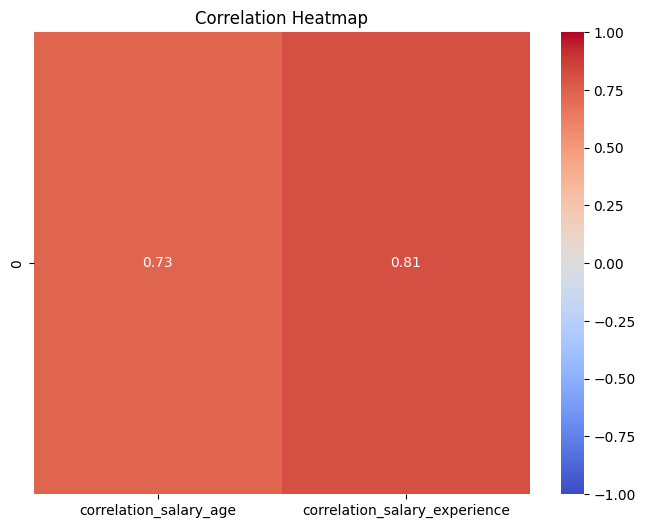

In [218]:
from pyspark.sql.functions import corr

# Calculate the correlation matrix
correlation_matrix = df_cleaned.select(
    corr("salary", "age").alias("correlation_salary_age"),
    corr("salary", "years of experience").alias("correlation_salary_experience")
)

# Show the correlation matrix
correlation_matrix.show()


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the correlation_matrix PySpark DataFrame to Pandas
correlation_matrix_pd = correlation_matrix.toPandas()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_pd, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

This shows a heatmap for the correlation between Salary and age, experience. It can be seen that salary is closely corelated to experience which becomes the base of our analysis further in the poject.

# Section 3: Transform the clean data

10 points

Once you have clean data, start to prepare it to fit your analysis tools. This might mean using custom code to normalize certain values, joining supplemental datasets, and/or preparing it for machine learning.

### This section should include one or more of the following:
- Write a UDF to perform a function, then use it to add a new column to your data. Explain why in [markdown](https://www.markdownguide.org/cheat-sheet) [INLCUDED]
- Join an outside data source. (It can be one you've prepared alongside the primary source you're using, as long as you link it)
- Split the data into train/test sets [INCLUDED]
- Create vectors for relavent features [INCLUDED]
- One-hot encode catagorical variables [INCLUDED]

In [219]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Define a UDF to categorize age groups
def categorize_age(age):
    if age < 25:
        return 'Under 25'
    elif age < 40:
        return '25-39'
    else:
        return '40 and above'

# Register the UDF
categorize_age_udf = udf(categorize_age, StringType())

# Add a new column 'AgeGroup' to the DataFrame
df_transformed = df_cleaned.withColumn('AgeGroup', categorize_age_udf('age'))

In [220]:
# Split the data into train and test
train_data, test_data = df_transformed.randomSplit([0.8, 0.2], seed=42)


In [221]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

# Create StringIndexer and OneHotEncoder for categorical columns
gender_indexer = StringIndexer(inputCol='gender', outputCol='gender_index')
gender_encoder = OneHotEncoder(inputCol='gender_index', outputCol='gender_encoded')

race_indexer = StringIndexer(inputCol='race', outputCol='race_index')
race_encoder = OneHotEncoder(inputCol='race_index', outputCol='race_encoded')

# Transform the data with StringIndexer
train_data_indexed = gender_indexer.fit(train_data).transform(train_data)
train_data_indexed = race_indexer.fit(train_data_indexed).transform(train_data_indexed)

# Combine categorical and numerical features
feature_columns = ['age', 'ExperiencePerAge', 'gender_encoded', 'race_encoded']
feature_assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

In [222]:
from pyspark.ml.feature import StringIndexer


categorical_cols = ['gender', 'education level', 'job title', 'country', 'race']

# Initialize StringIndexer for each categorical column
indexers = [StringIndexer(inputCol=col, outputCol=col+"_index") for col in categorical_cols]

# Fit and transform the DataFrame using the StringIndexers
indexer_models = [indexer.fit(df_cleaned) for indexer in indexers]
df_encoded = df_cleaned
for indexer, model in zip(indexers, indexer_models):
    df_encoded = model.transform(df_encoded)
    df_encoded = df_encoded.drop(indexer.getInputCol())

# Display label-encoded categorical features
df_encoded.show()


+-----+---+-------------------+--------+------------+---------------------+---------------+-------------+----------+
|sr_no|age|years of experience|  salary|gender_index|education level_index|job title_index|country_index|race_index|
+-----+---+-------------------+--------+------------+---------------------+---------------+-------------+----------+
|    0| 32|                  5| 90000.0|         0.0|                  0.0|            0.0|          3.0|       0.0|
|    1| 28|                  3| 65000.0|         1.0|                  1.0|            3.0|          0.0|       9.0|
|    2| 45|                 15|150000.0|         0.0|                  2.0|          106.0|          4.0|       0.0|
|    3| 36|                  7| 60000.0|         1.0|                  0.0|           23.0|          0.0|       9.0|
|    4| 52|                 20|200000.0|         0.0|                  1.0|          124.0|          0.0|       1.0|
|    5| 29|                  2| 55000.0|         0.0|           

In this section, we have performed several data preprocessing steps to prepare our dataset for analysis. Here's a breakdown of the key steps:

`Creating an UDF:` We defined a User-Defined Function (UDF) to categorize age groups based on specific criteria.

`Data Splitting:` We split the dataset into two subsets: the training dataset and the test dataset. We allocated 80% of the data to the training set, and the remaining 20% to the test set. This division allows us to train our models on one subset and evaluate their performance on another.

`Encoding Categorical Data:` We used various techniques to convert categorical data into numerical format, which is essential for many machine learning algorithms. These techniques include StringIndexer, OneHotEncoder, and VectorAssembler.

`StringIndexer:` We used StringIndexer to assign unique numerical labels to categorical columns like "gender," "race," and others.

`OneHotEncoder:` After StringIndexer, we applied OneHotEncoder to create binary vectors for each category in the labeled columns. This transformation helps algorithms treat categorical data properly.

`VectorAssembler:` We used VectorAssembler to combine the numerical and one-hot encoded features into a single vector column, which is often the format expected by machine learning models.

These preprocessing steps are crucial for ensuring that our dataset is suitable for building and training machine learning models. By converting categorical data into numerical format and splitting the data into training and testing subsets, we set the stage for more advanced analysis and modeling in the subsequent sections.

# Section 4: Show your analysis of the data

10 points

This is where the science happens. Use your data to show some kind of insight, and how you got there. Make the reader understand why it's important, and how they can get the same conslusion, and/or what would need to change to reach a different one.

### This section should include one or more of the following:
- Fit the data to a model
- Show the outcome of clustering, regression, and/or classification algorithms.
 - We used several in class, but you can use whatever fits your needs for this assignment
- Reccomend a product/item
- Use a SQL query to filter results


In [223]:
from pyspark.sql.functions import rand



# Split the dataset into training and testing
train_ratio = 0.8
test_ratio = 1 - train_ratio

# Add a random column for sampling
df_encoded = df_encoded.withColumn("rand", rand())

# Split the dataset using the random column
train_data = df_encoded.filter(df_encoded["rand"] <= train_ratio).drop("rand")
test_data = df_encoded.filter(df_encoded["rand"] > train_ratio).drop("rand")

# Show the number of rows in each set to confirm the split
print("Number of rows in train_data:", train_data.count())
print("Number of rows in test_data:", test_data.count())

# Split the features (X) and target (y)
X_train = train_data.drop("salary")
y_train = train_data.select("salary")

X_test = test_data.drop("salary")
y_test = test_data.select("salary")


Number of rows in train_data: 5338
Number of rows in test_data: 1360


In [254]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import RegressionEvaluator

# Define the feature columns
feature_columns = ['years of experience', 'age', 'job title_index', 'education level_index']

# Create a VectorAssembler
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Transform the DataFrame
data = vector_assembler.transform(df_encoded)

# Split the dataset into training and testing and add random column
train_ratio = 0.8
test_ratio = 1 - train_ratio
data = data.withColumn("rand", rand())

# Split the dataset using the random column
train_data = data.filter(data["rand"] <= train_ratio).drop("rand")
test_data = data.filter(data["rand"] > train_ratio).drop("rand")

# Create and fit a Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="salary")
lr_model = lr.fit(train_data)

# Make predictions on the test data
lr_predictions = lr_model.transform(test_data)

# Evaluate the model
lr_evaluator = RegressionEvaluator(labelCol="salary", predictionCol="prediction", metricName="r2")
lr_r2 = lr_evaluator.evaluate(lr_predictions)
print("Linear Regression R-squared:", lr_r2)


Linear Regression R-squared: 0.7208596373895026


In [252]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Define the feature columns
feature_columns = ['years of experience', 'age', 'job title_index','education level_index' ]

# Create a VectorAssembler to assemble the feature columns into a single feature vector
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")

# Transform the DataFrame
df_features = vector_assembler.transform(df_encoded)

# Split the dataset into training and testing sets
train_data, test_data = df_features.randomSplit([0.8, 0.2], seed=42)

# Create a RandomForestRegressor model
rf = RandomForestRegressor(featuresCol="features", labelCol="salary", seed=42, maxBins=200)  # Adjust maxBins as needed

# Fit the model
rf_model = rf.fit(train_data)

# Make predictions on the test data
rf_predictions = rf_model.transform(test_data)

# Evaluate the Random Forest Regressor model using R-squared
rf_evaluator = RegressionEvaluator(labelCol="salary", predictionCol="prediction", metricName="r2")
rf_r2 = rf_evaluator.evaluate(rf_predictions)
print("Random Forest Regressor R-squared:", rf_r2)


Random Forest Regressor R-squared: 0.8888519073073431


From this regression model we have tried to predict the accuracy of the salary using Liner Regression and Decision Trees. It can be observed that Liner Regressin has a relativelyy low accuracy where the R squared is only 72% while the decision tree has a higher R squared of 88%. Showing that the decsion tree is a beter fit for the model as compared to linear regression.

# Are Women Paid Les than Men ?


In [226]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg

# Initialize a Spark session
spark = SparkSession.builder.appName("GenderSalaryAnalysis").getOrCreate()

# Assuming you have a PySpark DataFrame named 'df_cleaned'
# Group the data by "Gender" and calculate the average salary for each group
gender_salary_avg = df_cleaned.groupBy("Gender").agg(avg("Salary").alias("AverageSalary"))

# Show the result
gender_salary_avg.show()

+------+------------------+
|Gender|     AverageSalary|
+------+------------------+
|Female|107888.99867241952|
| Other|125869.85714285714|
|  Male|121395.69763007356|
+------+------------------+



Based on this someone can easily conclude that Females are paid less on an annual basis as compared to Male.

In [227]:
from scipy.stats import f_oneway

# Extract salary values for each category of gender_index
gender_0_salary = df_encoded.filter(df_encoded['gender_index'] == 0).select('salary').rdd.flatMap(lambda x: x).collect()
gender_1_salary = df_encoded.filter(df_encoded['gender_index'] == 1).select('salary').rdd.flatMap(lambda x: x).collect()

# Perform ANOVA test
f_statistic, p_value = f_oneway(gender_0_salary, gender_1_salary)

# Display the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

F-Statistic: 110.02553365094974
P-Value: 1.5264743340371342e-25


The F-statistic of approximately 110.03 and the very small p-value (approximately 1.53e-25) indicate a statistically significant difference in salary between the different gender categories (0 and 1).

With such a low p-value, you can conclude that there is strong evidence to reject the null hypothesis, suggesting that there is indeed a significant difference in salary between the two gender categories.

This analysis provides valuable insights into the relationship between gender and salary within your dataset. You can repeat similar analyses for other categorical variables to explore their impact on salary as well.

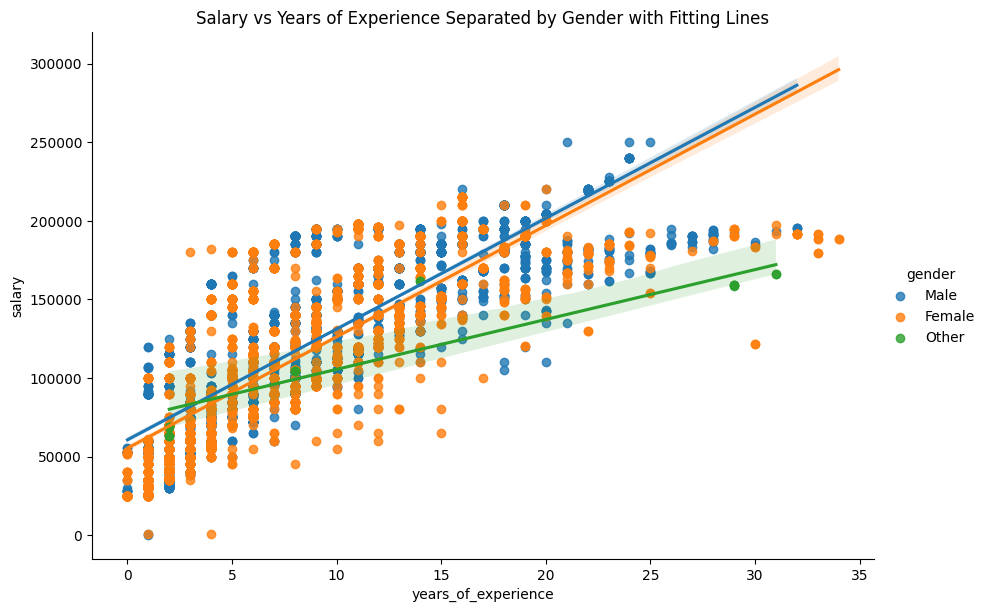

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rename the columns with backticks if needed
df_cleaned = df_cleaned.withColumnRenamed("years of experience", "years_of_experience").withColumnRenamed("Salary", "salary")

# Create an lmplot to plot Salary vs Years of Experience separated by Gender
sns.lmplot(x="years_of_experience", y="salary", hue="gender", data=df_cleaned.toPandas(), height=6, aspect=1.5)

# Set the title
plt.title("Salary vs Years of Experience Separated by Gender with Fitting Lines")

# Show the plot
plt.show()


While this plot shows that the margin between the paygap between men and women exists, however the margin is extremely slim, and it also shows that women tend to earn more later down their carees after around 32 years of age.

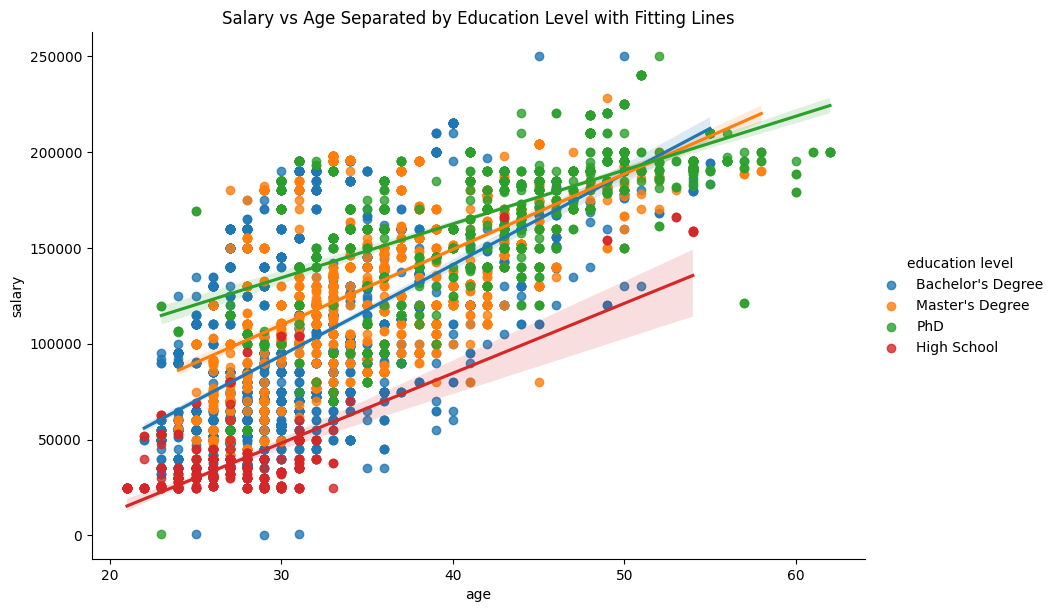

In [230]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create an lmplot to plot Salary vs Age separated by Education Level
plot = sns.lmplot(x="age", y="salary", hue="education level", data=df_cleaned.toPandas(), height=6, aspect=1.5)

# Set the title
plot.set(title="Salary vs Age Separated by Education Level with Fitting Lines")

# Show the plot

This supports our hypothesis that, on average, individuals with higher education levels tend to have higher starting salaries. However, it's intriguing to observe that there is a point, around the age of 52, where individuals with Bachelor's, Master's, and Ph.D. degrees may converge and have similar income levels.

In [231]:
from pyspark.sql import functions as F

# Group the DataFrame by job title and count the occurrences of each title
job_title_counts = df_cleaned.groupBy("Job Title").count()

# Sort the counts in descending order and select the top 20
top_20_job_titles = job_title_counts.orderBy(F.desc("count")).limit(20)

# Show the top 20 job titles
top_20_job_titles.show()

+--------------------+-----+
|           Job Title|count|
+--------------------+-----+
|   Software Engineer|  518|
|      Data Scientist|  453|
|Software Engineer...|  376|
|        Data Analyst|  363|
|Senior Project En...|  318|
|     Product Manager|  313|
| Full Stack Engineer|  308|
|   Marketing Manager|  255|
|  Back end Developer|  244|
|Senior Software E...|  244|
| Front end Developer|  241|
|Marketing Coordin...|  158|
|Junior Sales Asso...|  142|
|   Financial Manager|  134|
|   Marketing Analyst|  132|
|  Software Developer|  125|
|  Operations Manager|  114|
|Human Resources M...|  104|
|Director of Marke...|   88|
|       Web Developer|   87|
+--------------------+-----+



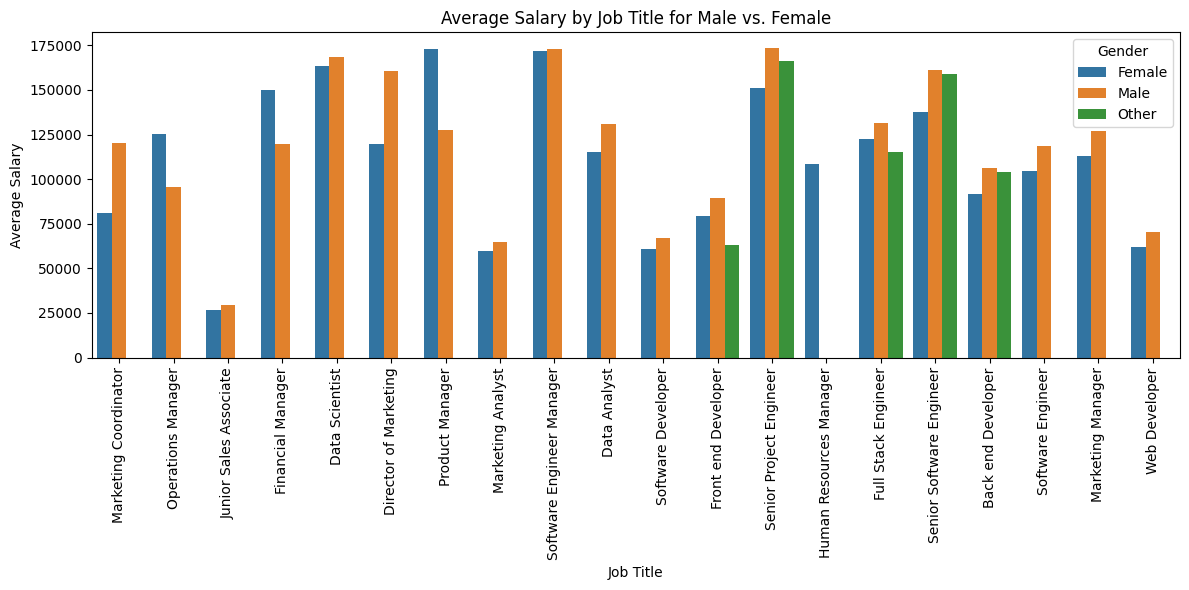

In [232]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top 20 job titles
filtered_df = df_cleaned.filter(df_cleaned["Job Title"].isin([row["Job Title"] for row in top_20_job_titles.collect()]))

# Calculate the average salary
average_salary_by_gender = filtered_df.groupBy("Job Title", "Gender").agg(F.avg("Salary").alias("Avg Salary"))

# Convert the DataFrame to Pandas for plotting
average_salary_pd = average_salary_by_gender.toPandas()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Job Title", y="Avg Salary", hue="Gender", data=average_salary_pd)
plt.xticks(rotation=90)
plt.title("Average Salary by Job Title for Male vs. Female")
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


In this plot, we aimed to examine the top 20 job titles and the distribution of their salaries among men and women. On average, it appears that women are paid slightly less for the same job compared to men. This observation aligns with the prevailing notion that there is a gender pay gap favoring men. However, it's crucial to emphasize that drawing conclusions solely based on a single variable can be quite misleading.

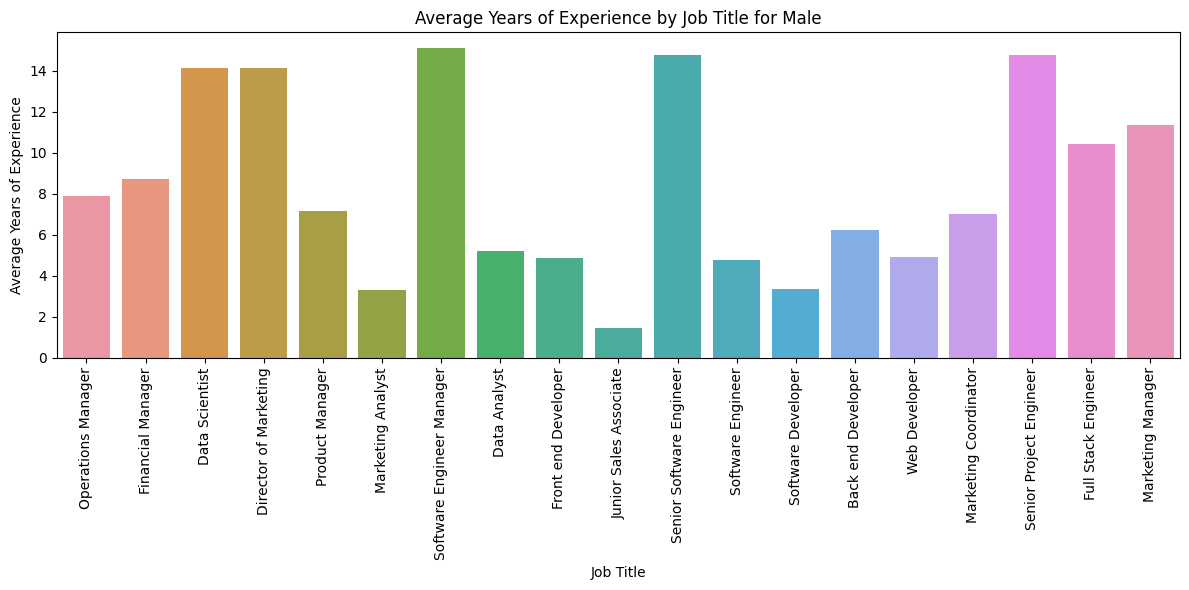

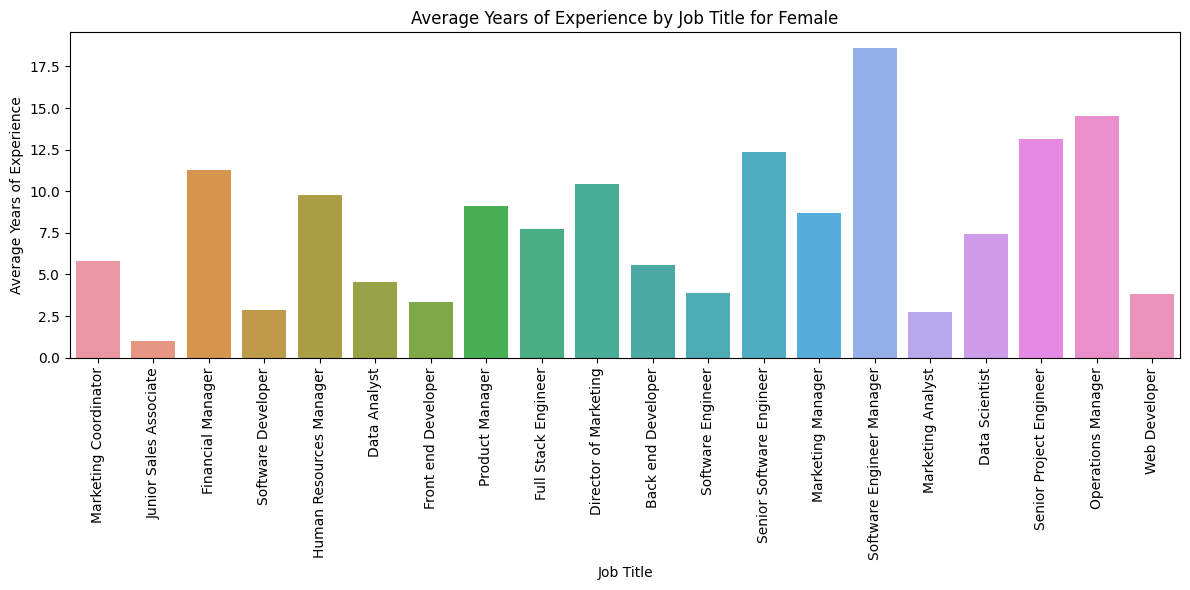

In [234]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the filtered DataFrame by job title, gender, and calculate the average years of experience
average_experience_by_gender = filtered_df.groupBy("job title", "gender").agg(F.avg("years_of_experience").alias("Avg Experience"))

# Convert the DataFrame to Pandas for plotting
average_experience_pd = average_experience_by_gender.toPandas()

# Create separate plots for men and women
for gender in ["Male", "Female"]:
    plt.figure(figsize=(12, 6))
    sns.barplot(x="job title", y="Avg Experience", data=average_experience_pd[average_experience_pd["gender"] == gender])
    plt.xticks(rotation=90)
    plt.title(f"Average Years of Experience by Job Title for {gender}")
    plt.xlabel("Job Title")
    plt.ylabel("Average Years of Experience")
    plt.tight_layout()
    plt.show()


From this analysis, it becomes evident that one of the crucial determinants of salary is the years of experience an individual possesses. Years of experience significantly influence an individual's salary, and it is imperative to include this essential parameter to ensure fairness and accuracy in our salary calculations.

In [235]:
from pyspark.sql import functions as F

# Group the DataFrame by job title, gender, and calculate the average years of experience
average_experience_by_gender = filtered_df.groupBy("job title", "gender").agg(F.avg("years_of_experience").alias("Avg Experience"))

# Pivot the data to separate male and female averages
pivoted_data = average_experience_by_gender.groupBy("job title").pivot("gender").agg(F.first("Avg Experience"))

# Calculate the percentage difference
pivoted_data = pivoted_data.withColumn("Percentage Experience Difference", F.expr("(Male - Female) / Female * 100"))

# Show the result
pivoted_data.show(truncate=False)
exp_vs_salary_df = pivoted_data.select("job title", "Percentage Experience Difference")

+-------------------------+------------------+------------------+-----+--------------------------------+
|job title                |Female            |Male              |Other|Percentage Experience Difference|
+-------------------------+------------------+------------------+-----+--------------------------------+
|Financial Manager        |11.281553398058252|8.741935483870968 |null |-22.511243129198817             |
|Senior Project Engineer  |13.135922330097088|14.788732394366198|31.0 |12.58236782111739               |
|Marketing Manager        |8.668508287292818 |11.378378378378379|null |31.261089004874854              |
|Marketing Coordinator    |5.802547770700637 |7.0               |null |20.636663007683858              |
|Web Developer            |3.7948717948717947|4.895833333333333 |null |29.01182432432432               |
|Front end Developer      |3.317757009345794 |4.856060606060606 |2.0  |46.3657703798549                |
|Back end Developer       |5.553846153846154 |6.2316384

In this analysis, the "Percentage Experience Difference" metric reveals a noteworthy insight for the position of Financial Manager. It indicates that, on average, male employees in this role possess 22% less experience compared to the average experience level of female employees holding the same position. This calculation allows for a meaningful comparison between the variables of experience and salary.

In [237]:
from pyspark.sql import functions as F

# Group the DataFrame by job title, gender, and calculate the average salary
average_salary_by_gender = filtered_df.groupBy("job title", "gender").agg(F.avg("salary").alias("Avg Salary"))

# Pivot the data to separate male and female averages
pivoted_data = average_salary_by_gender.groupBy("job title").pivot("gender").agg(F.first("Avg Salary"))

# Calculate the percentage difference
pivoted_data = pivoted_data.withColumn("Percentage Income Difference", F.expr("(Male - Female) / Female * 100"))

# Show the result
pivoted_data.show(truncate=False)


+-------------------------+------------------+------------------+--------+----------------------------+
|job title                |Female            |Male              |Other   |Percentage Income Difference|
+-------------------------+------------------+------------------+--------+----------------------------+
|Financial Manager        |150097.08737864078|119677.41935483871|null    |-20.26666110253307          |
|Senior Project Engineer  |150938.98058252427|173617.55399061032|166109.0|15.02499441864641           |
|Marketing Manager        |113060.77348066299|127202.7027027027 |null    |12.50825444287133           |
|Marketing Coordinator    |80808.91719745223 |120000.0          |null    |48.498462993615505          |
|Web Developer            |61794.8717948718  |70208.33333333333 |null    |13.615145228215756          |
|Front end Developer      |79346.19626168224 |89325.79545454546 |62852.0 |12.577287460574274          |
|Back end Developer       |91942.93846153846 |106155.25423728813


The table provides insights into the salary disparity between men and women in the Financial Manager position. It reveals that, for this role, men earn approximately 20% less than their female counterparts. This observation underscores the relationship between lower levels of experience and reduced income, forming an integral part of our hypothesis.

In [238]:
# Join the exp_vs_salary_df with pivoted_data using "job title" as the merge key
merged_df = exp_vs_salary_df.join(pivoted_data.select("job title", "Percentage Income Difference"), on="job title", how="left")

# Show the merged DataFrame
merged_df.show(truncate=False)


+-------------------------+--------------------------------+----------------------------+
|job title                |Percentage Experience Difference|Percentage Income Difference|
+-------------------------+--------------------------------+----------------------------+
|Financial Manager        |-22.511243129198817             |-20.26666110253307          |
|Senior Project Engineer  |12.58236782111739               |15.02499441864641           |
|Marketing Manager        |31.261089004874854              |12.50825444287133           |
|Marketing Coordinator    |20.636663007683858              |48.498462993615505          |
|Web Developer            |29.01182432432432               |13.615145228215756          |
|Front end Developer      |46.3657703798549                |12.577287460574274          |
|Back end Developer       |12.204015837989267              |15.45775674952455           |
|Software Engineer Manager|-18.74095175827769              |0.5624496418214289          |
|Data Scie

Wer have merged both the tables to see the exact one to one relation between the two parameters.

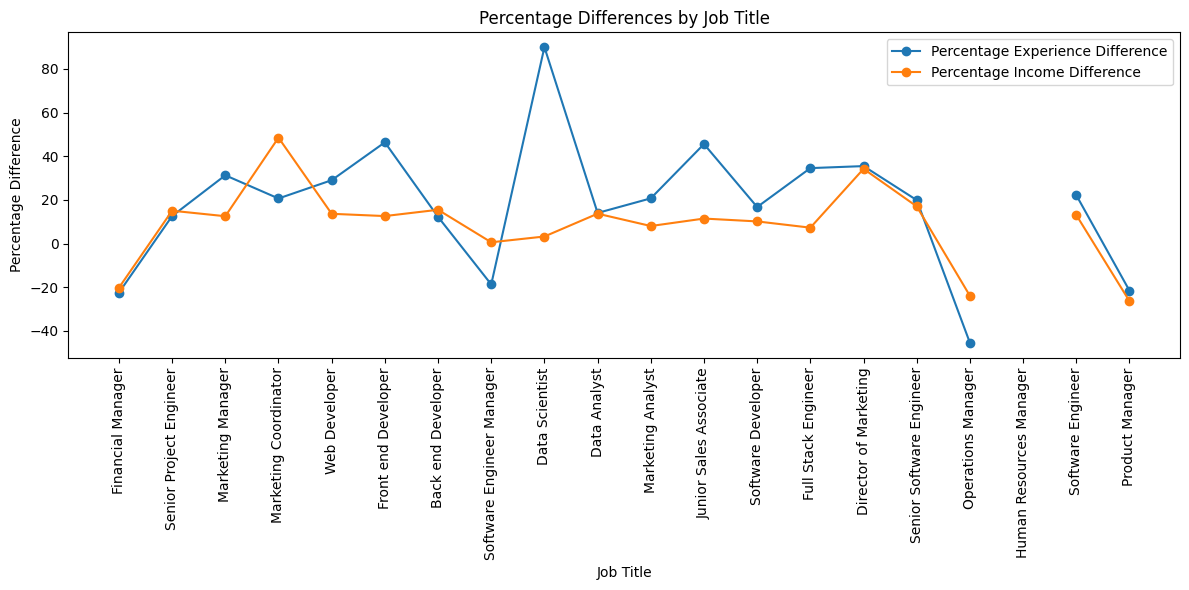

In [239]:
import matplotlib.pyplot as plt

# Extract the data for plotting
job_titles = merged_df.select("job title").rdd.flatMap(lambda x: x).collect()
experience_diff = merged_df.select("Percentage Experience Difference").rdd.flatMap(lambda x: x).collect()
income_diff = merged_df.select("Percentage Income Difference").rdd.flatMap(lambda x: x).collect()

# Create a line chart
plt.figure(figsize=(12, 6))
plt.plot(job_titles, experience_diff, label="Percentage Experience Difference", marker='o')
plt.plot(job_titles, income_diff, label="Percentage Income Difference", marker='o')
plt.xticks(rotation=90)
plt.title("Percentage Differences by Job Title")
plt.xlabel("Job Title")
plt.ylabel("Percentage Difference")
plt.legend()
plt.tight_layout()
plt.show()


In [240]:
from pyspark.sql import functions as F

# Calculate the average for Percentage Experience Difference and Percentage Income Difference
average_percentage_diff = merged_df.agg(
    F.avg("Percentage Experience Difference").alias("Avg Percentage Experience Difference"),
    F.avg("Percentage Income Difference").alias("Avg Percentage Income Difference")
)

# Show the result
average_percentage_diff.show()

+------------------------------------+--------------------------------+
|Avg Percentage Experience Difference|Avg Percentage Income Difference|
+------------------------------------+--------------------------------+
|                  18.039993499743794|               8.715153964697961|
+------------------------------------+--------------------------------+



Upon analyzing the data comprehensively, we find that our initial hypothesis, suggesting that men are paid more than women, represents only a partial truth. It's evident that an individual's compensation is influenced by numerous factors, including education, GPA, years of experience, previous employers, behavior, skills, and more. Focusing solely on salary statistics oversimplifies the complexity of these determinants.

The table presented here highlights a key aspect. Among the top 20 job titles, men possess, on average, 18% more years of experience than women, resulting in an 8% increase in their pay compared to women. This finding emphasizes that salary is not solely determined by gender but is instead the culmination of various contributing factors. Therefore, it's safe to conclude that the hypothesis suggesting men are paid more than women is not accurate.





